# Introducció a la pràctica 1: primers passos

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar models de regressió, ficant l'èmfasi en: 
    1. Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant
    4. Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


### Jupyter Notebook

Aquest ``jupyter notebook`` està compost de blocs de text i codi, recordeu que hi ha blocs de codi que depenen de que blocs anteriors hagin estat executats. 

El codi d'aquest notebook és modificable i us recomanem que feu canvis i en comproveu els resultats.

**Per a executar el notebook: cal que instal.leu [jupyter notebook](http://jupyter.readthedocs.io/en/latest/install.html).**


### Guia d'instal.lació de les llibreries


És molt recomanable que utilitzeu Linux, ja que agilitza la instal.lació de les llibreries. També es recomana utilitzar **Anaconda**, una distribucó de python multiplataforma que permet instal.lar llibreries fàcilment i l'IDE d'spyder o PyCharm.

Donat que teniu conda o pypi (pip) (aquest segon es pot instal.lar amb ``apt-get``), heu d'instal.lar els següents paquets (exemple en pypi):

```
sudo pip install numpy
sudo pip install scikit-learn
sudo pip install matplotlib
sudo pip install scipy
```

En el cas d'Anaconda, substituir ``sudo pip`` per ``conda``.

En el cas del matplotlib, si us dona errors en Ubuntu Linux (`FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'`), cal instal·lar el paquet `texlive-full` (`sudo apt install texlive-full`) que ocupa 3-4GB. Si només ho voleu per aquesta pràctica, podeu provar amb el `textlive-base` (uns 100MB)


## Avaluació i entregues de la pràctica 1

En la pràctica 1, es presenten diversos problemes per comprendre els mètodes de regressió numèrica. 

Les entregues s'organitzen en tres nivells d'assoliment dels objectius, incrementals: apartat **C (sobre 5 punts)**, assoliment baix, apartat **B, (sobre 3 punts)**, assoliment mig i apartat **A, (sobre 2 punts)**, assoliment alt. La suma dels 3 apartats serà la nota final de la pràctica 1.

Per aprovar la pràctica és requisit necessari completar satisfactòriament els problemes d'assoliment baix (C), demostrant així una comprensió mínima de la matèria. Per tant, la superació de la pràctica 1 estarà condicionada a la presentació de la documentació sobre l'apartat (C), i serà opcional realitzar els apartats (B i A).

Resumint, la pràctica 1 conté 3 apartats:

* apartat C. serà obligatori per aprovar la pràctica 1 (amb un 5.0)
* apartat B. serà opcional i val fins a 3 punts (cal haver fet el apartat C).
* apartat A. serà opcional i val fins a 2 punts (cal haver fet el apartat C i B).


### Sessió de treball i sessió d'avaluació

La sessió de treball de **8/10**, està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les bases de dades que us han estat assignades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades.

En definitiva, l'objectiu de la sessió és que al sortir tingueu clar com són les vostres dades, què cal entregar i com implementar cada apartat C, B i A. Per això, si ja ho teniu clar, l'assistència és voluntària.

En la següent sessió del **29/10**, la màxima puntuació per la **pràctica 1 de regressió** s'aconsegueix resolent els problemes dels apartats (B i A), d'entrega opcional. Caldrà pujar al Caronte abans de les 00:59 del dijous 28 d'octubre un ZIP amb el codi, la documentació i el ppt (10 minuts) dels apartats (B i A) sobre regressió. Podeu "recuperar" l'apartat (C) entregant-ho per aquesta sessió, ja que fer l'apartat (B) és obligatori haver completat el (C).

* Entrega ZIP 
   1. Memòria explicant els resultats trobats en la base de dades que heu treballat, detallant el passos seguits (60% de la nota). 
   2. Codi python desenvolupat (30% de la nota)
   3. Presentació amb els resultats 10 min màxim (10% de la nota)





## Material de la pràctica 1

1. Bases de dades a Kaggle: cada grup utilitzarà les bases de dades que se li hagin assignat. 
2. Codi d'exemple (aquest document).
3. Apunts de l'assignatura.
4. Llibreries de python: scikit-learn, numpy, scipy, matplotlib.

### Bases de Dades

| # | URL | GRUP |
|:-:|:--|:-:|
|	1	|	https://www.kaggle.com/mohansacharya/graduate-admissions	|	GPA101-0830	|
|	2	|	https://www.kaggle.com/primaryobjects/voicegender	|	GPA102-0830	|
|	3	|	https://www.kaggle.com/mirichoi0218/insurance	|	GPA103-0830	|
|	4	|	https://www.kaggle.com/rhuebner/human-resources-data-set	|	GPA104-0830	|
|	5	|	https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009	|	GPA105-0830	|
|	6	|	https://www.kaggle.com/kumarajarshi/life-expectancy-who	|	GPA201-0930	|
|	7	|	https://www.kaggle.com/marklvl/bike-sharing-dataset	|	GPA202-0930	|
|	8	|	https://www.kaggle.com/vikrishnan/boston-house-prices	|	GPA203-0930	|
|	9	|	https://www.kaggle.com/imnikhilanand/heart-attack-prediction	|	GPA204-0930	|
|	10	|	https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo	|	GPA205-0930	|
|	11	|	https://www.kaggle.com/anderas/car-consume	|	GPA301-1030	|
|	12	|	https://www.kaggle.com/edgarhuichen/nba-players-career-game-log	|	GPA302-1030	|
|	13	|	https://www.kaggle.com/dipam7/student-grade-prediction	|	GPA303-1030	|
|	14	|	https://www.kaggle.com/navoneel/fta-data	|	GPA304-1030	|
|	15	|	https://www.kaggle.com/maajdl/yeh-concret-data	|	GPA305-1030	|
|	16	|	https://www.kaggle.com/mrisdal/combo17-galaxy-dataset	|	GPA401-1130	|
|	17	|	https://www.kaggle.com/elikplim/forest-fires-data-set	|	GPA402-1130	|
|	18	|	https://www.kaggle.com/rodolfomendes/abalone-dataset	|	GPA403-1130	|
|	19	|	https://www.kaggle.com/ravisane1/market-price-of-onion-2020	|	GPA404-1130	|
|	20	|	https://www.kaggle.com/fredgirod/web-crawler-for-real-estate-market	|	GPA405-1130	|
|	21	|	https://www.kaggle.com/avikasliwal/used-cars-price-prediction	|	GPA501-1230	|
|	22	|	https://www.kaggle.com/shebrahimi/financial-distress	|	GPA502-1230	|
|	23	|	https://www.kaggle.com/usda/the-national-summary-of-meats	|	GPA503-1230	|
|	24	|	https://www.kaggle.com/uciml/electric-power-consumption-data-set	|	GPA504-1230	|
|	25	|	https://www.kaggle.com/manishkc06/engineering-graduate-salary-prediction	|	GPA505-1230	|
|	26	|	https://www.kaggle.com/jsphyg/tipping	|	GPA601-1530	|
|	27	|	https://www.kaggle.com/amarpandey/world-life-expectancy-18002016	|	GPA602-1530	|
|	28	|	https://www.kaggle.com/snehal1405/yellow-stone-national-park	|	GPA603-1530	|
|	29	|	https://www.kaggle.com/nisargpatel/automobiles	|	GPA604-1530	|
|	30	|	https://www.kaggle.com/sabermalek/tapds	|	GPA605-1530	|
|	31	|	https://www.kaggle.com/noordeen/insurance-premium-prediction	|	GPA606-1530	|
|	32	|	https://www.kaggle.com/olgabelitskaya/russian-financial-indicators	|	GPA607-1530	|
|	33	|	https://www.kaggle.com/ramkumarr02/deodorant-instant-liking-data	|	GPA608-1530	|



# Apartat (C): Analitzant Dades

L'objectiu d'aquest primer apartat serà conèixer la base de dades que es té entre mans. S'han d'analitzar els diferents atributs que la composen, entendre'ls i, si no està estipulat, **caldrà fixar quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades**, justificant el per què de la decisió (és útil i representatiu pel problema, per exemple, donat un conjunt de dades sobre persones: edat, gènere, pes, alçada, risc de patir càncer, aquesta última pot ser justificada com la de més interés). També podeu mirar que l'atribut objectiu tingui valors que canvien. Per exemple, no té sentit predir un atribut on el 99% dels valors són 0, i hi ha algun 1.

Ara podeu veure un exemple amb una base de dades **dummy** que creem nosaltres mateixos:

In [33]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('insurance.csv')
data = dataset.values

x = data[:, :2] #edat
y = data[:, 2] #bmi

print("Dimensionalitat de la BBDD:", dataset.shape) #shape of the data
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (1338, 7)
Dimensionalitat de les entrades X (1338, 2)
Dimensionalitat de l'atribut Y (1338,)


Algunes bases de dades tenen valors no existents. Numpy els representa amb ``np.nan``. Per a treure'ls, podeu fer: ``dades[np.isnan(dades)] = valor``. Podeu mirar com afecten diferents estratègies d'assignar ``valor``. Per exemple, pot ser 0, la mitja, la mediana, .... També podeu analitzar si hi ha algun atribut perdut (que té molts valors no existents) i valorar si eliminar directament l'atribut.

A més, utilitzeu la llibreria pandas, i no `np.genfromtxt()` ja que llegeix només valors numèrics, i els NaN els converteix a string. Si esteu empenyats en utilitzar `np.genfromtxt()`, caldrà posar-li com a paràmetre `dtype=object`

In [34]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [35]:
# Convertim els atributs de tipus 'objecte' en números 

cnt_sex=dataset['sex'].value_counts().to_frame()
cnt_smoker=dataset["smoker"].value_counts().to_frame()
cnt_reg=dataset['region'].value_counts().to_frame()
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
dataset.iloc[:,1]=le.fit_transform(dataset.iloc[:,1])
dataset.iloc[:,4]=le.fit_transform(dataset.iloc[:,4])
dataset.iloc[:,5]=le.fit_transform(dataset.iloc[:,5])



In [36]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.924
1,18,1,33.770,1,0,2,1725.552
2,28,1,33.000,3,0,2,4449.462
3,33,1,22.705,0,0,1,21984.471
4,32,1,28.880,0,0,1,3866.855


In [39]:
print("Per visualitzar informació de la BBDD:")
dataset.info()

Per visualitzar informació de la BBDD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [40]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


,age,sex,bmi,children,smoker,region,charges
count,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000
mean,39.207,0.505,30.663,1.095,0.205,1.516,13270.422
std,14.050,0.500,6.098,1.205,0.404,1.105,12110.011
min,18.000,0.000,15.960,0.000,0.000,0.000,1121.874
25%,27.000,0.000,26.296,0.000,0.000,1.000,4740.287
50%,39.000,1.000,30.400,1.000,0.000,2.000,9382.033
75%,51.000,1.000,34.694,2.000,0.000,2.000,16639.913
max,64.000,1.000,53.130,5.000,1.000,3.000,63770.428


<IPython.core.display.Javascript object>


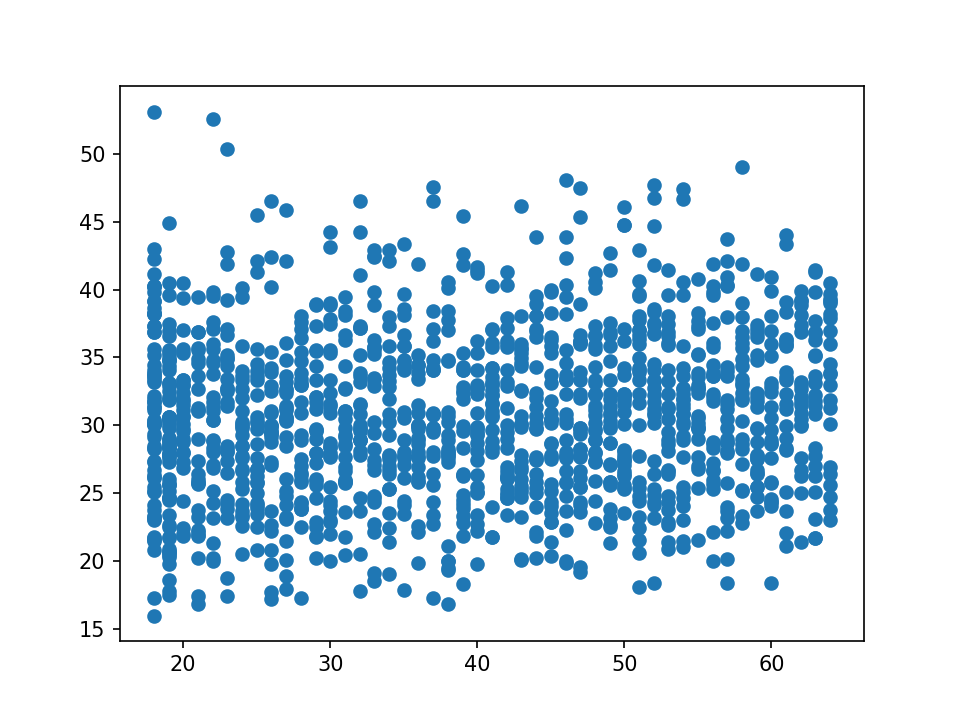

In [41]:
# mostrem atribut 0
plt.figure()

ax = plt.scatter(x[:,0], y)

<IPython.core.display.Javascript object>


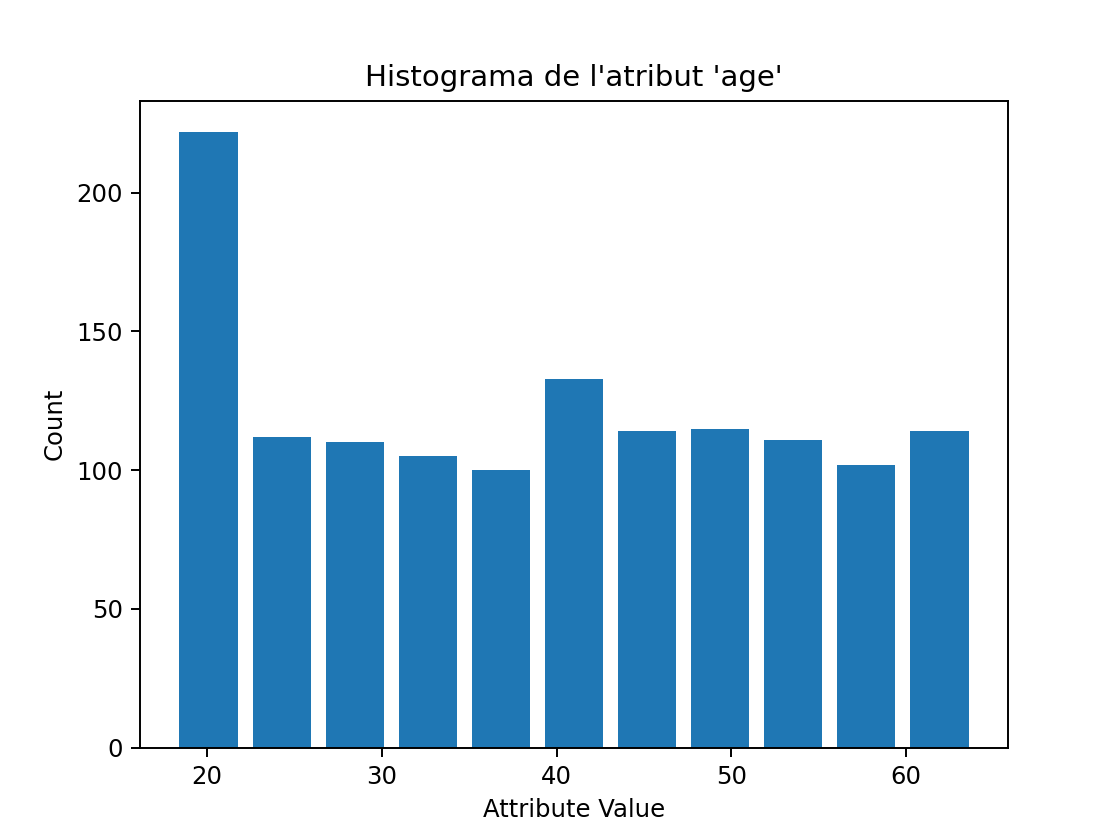

In [50]:
plt.figure()
plt.title("Histograma de l'atribut 'age'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,0], bins=11, range=[np.min(x[:,0]), np.max(x[:,0])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


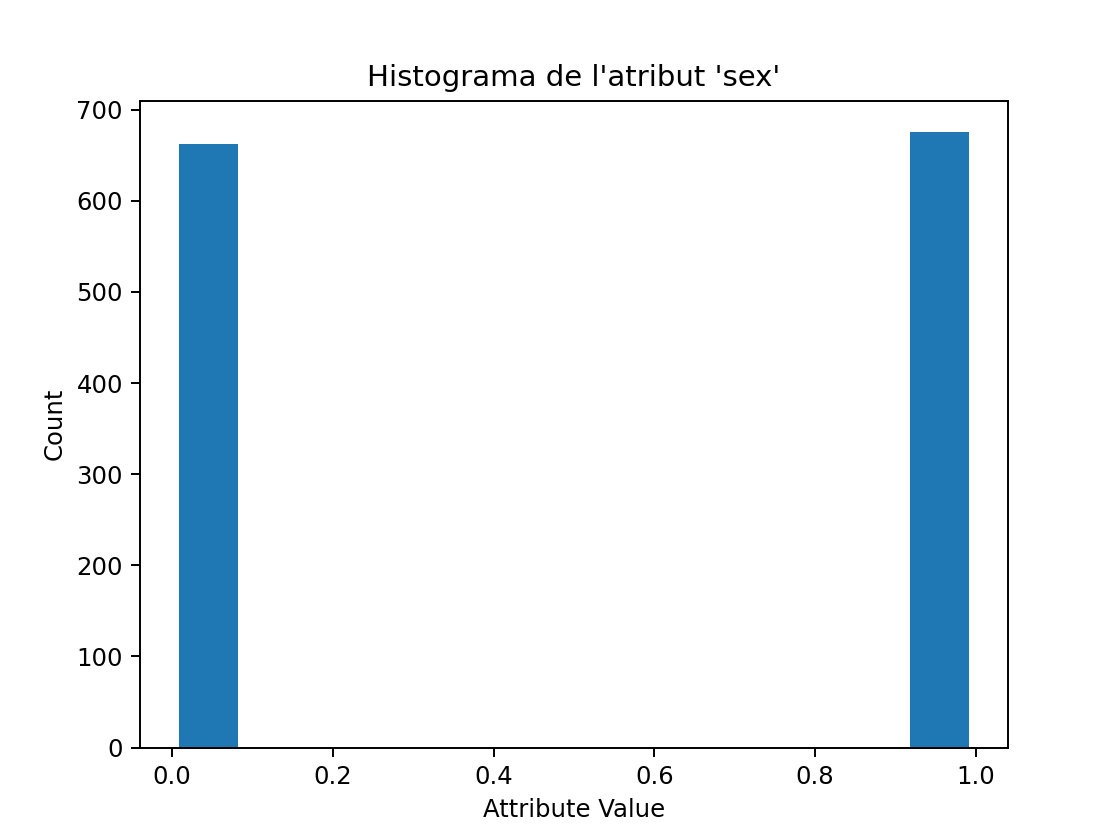

In [52]:
plt.figure()
plt.title("Histograma de l'atribut 'sex'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['sex'], bins=11, range=[np.min(dataset['sex']), np.max(dataset['sex'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


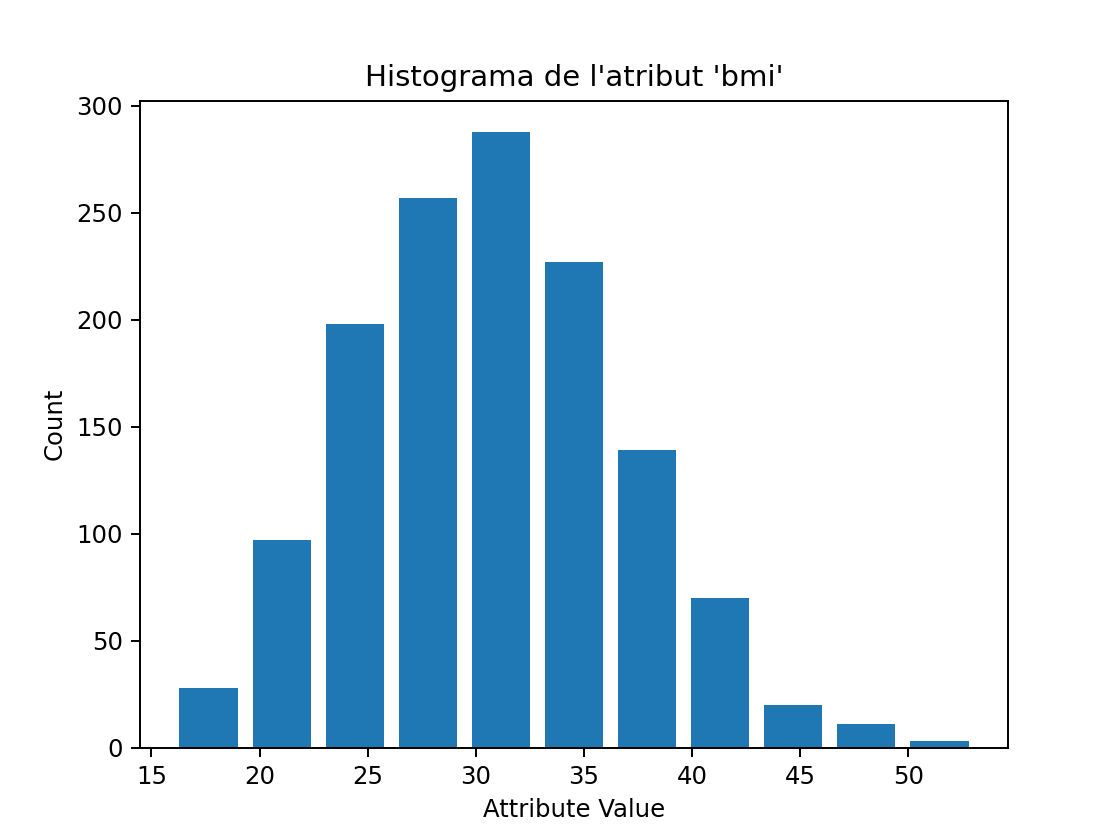

In [53]:
plt.figure()
plt.title("Histograma de l'atribut 'bmi'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['bmi'], bins=11, range=[np.min(dataset['bmi']), np.max(dataset['bmi'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


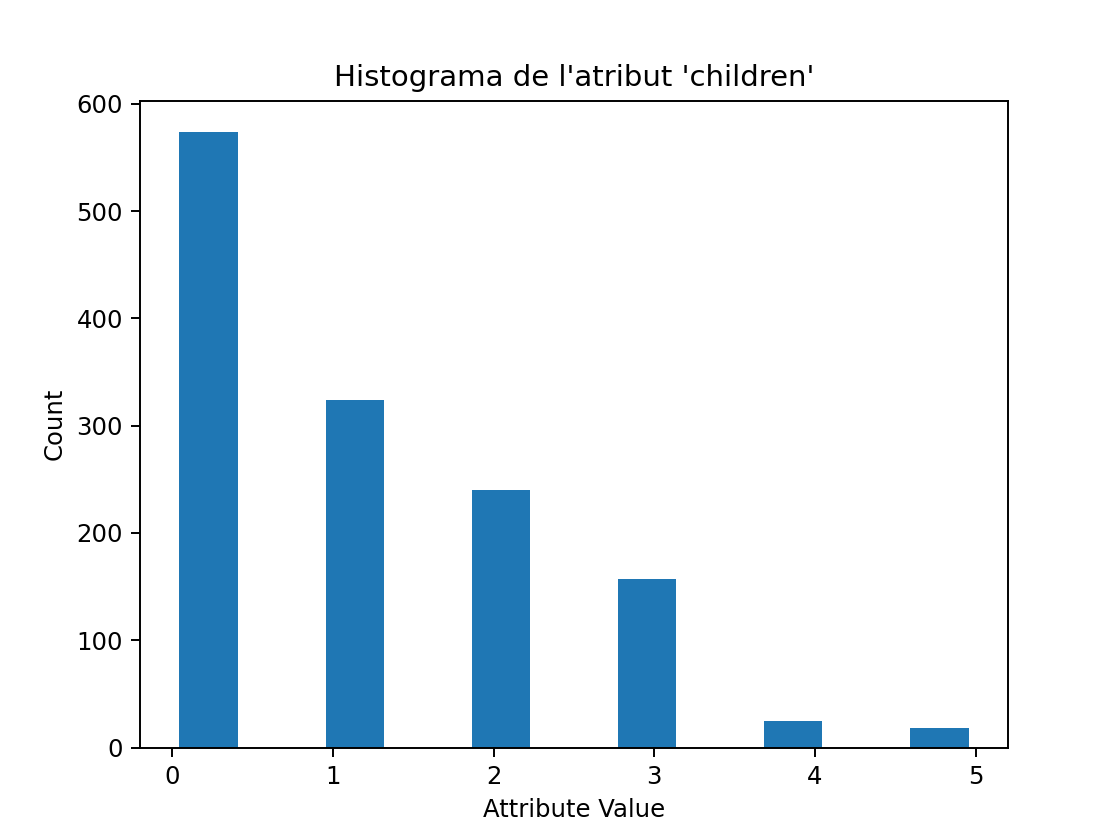

In [54]:
plt.figure()
plt.title("Histograma de l'atribut 'children'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['children'], bins=11, range=[np.min(dataset['children']), np.max(dataset['children'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


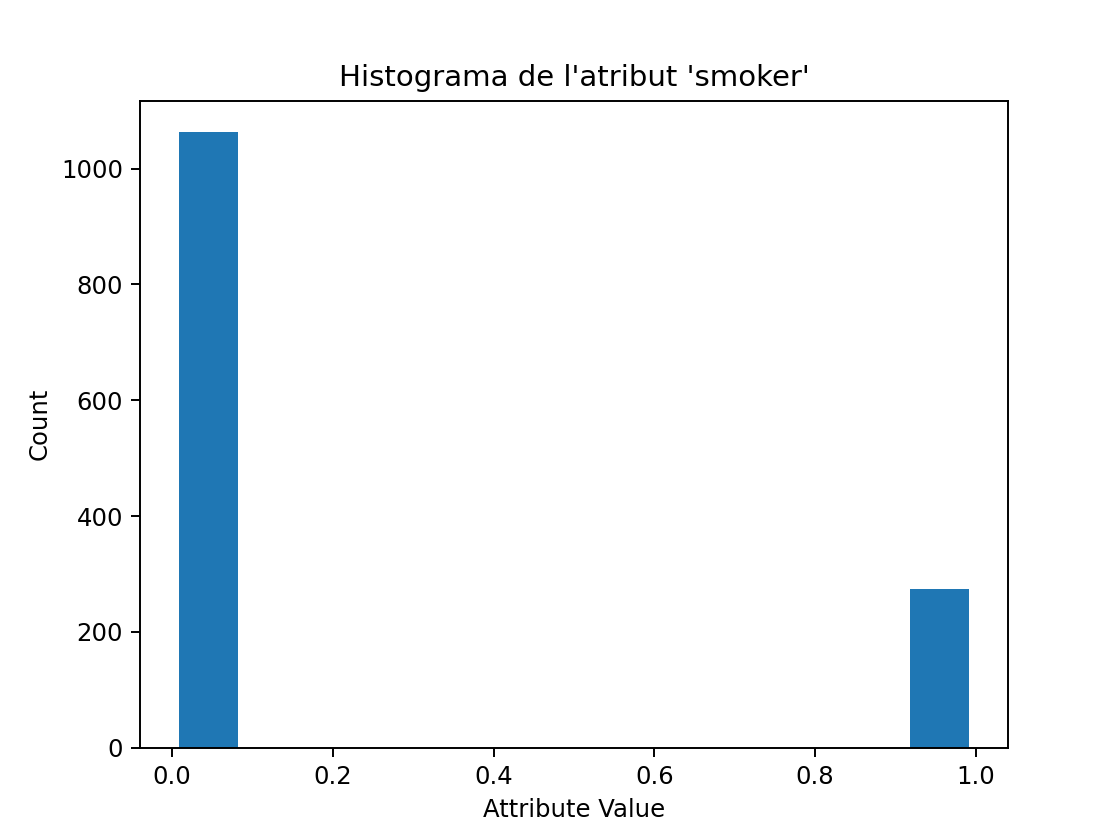

In [55]:
plt.figure()
plt.title("Histograma de l'atribut 'smoker'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['smoker'], bins=11, range=[np.min(dataset['smoker']), np.max(dataset['smoker'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


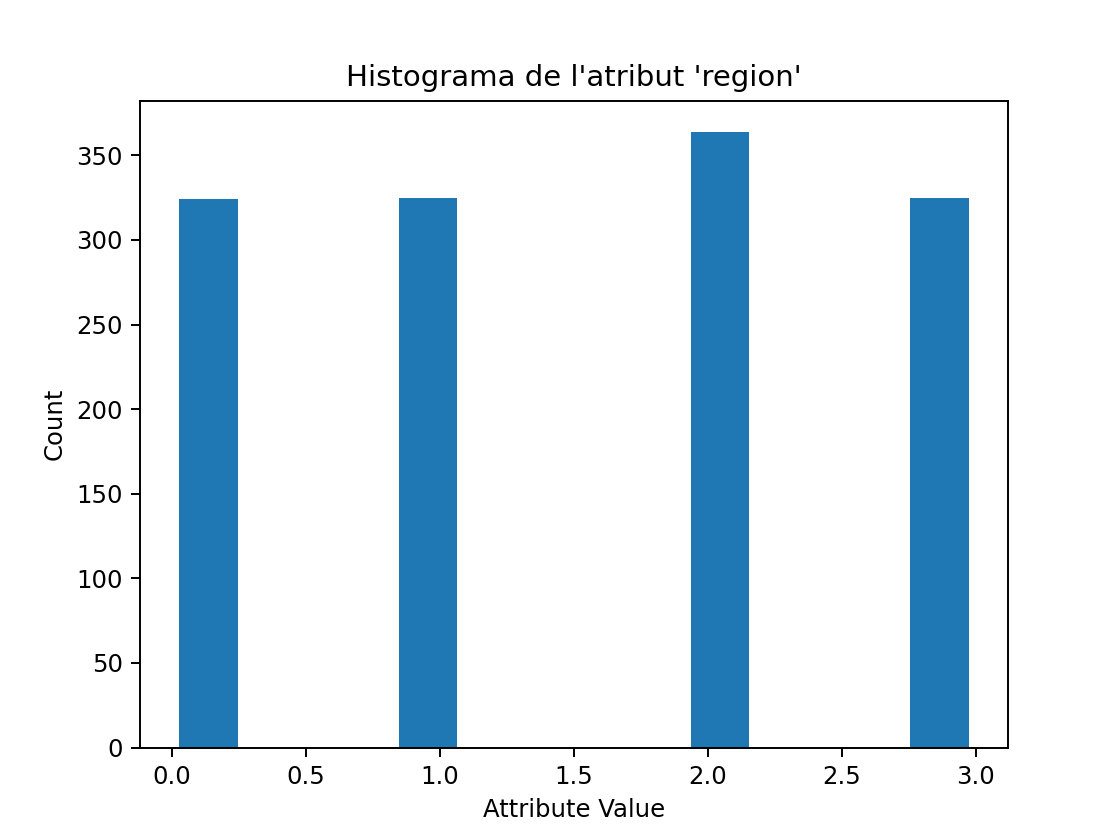

In [56]:
plt.figure()
plt.title("Histograma de l'atribut 'region'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['region'], bins=11, range=[np.min(dataset['region']), np.max(dataset['region'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


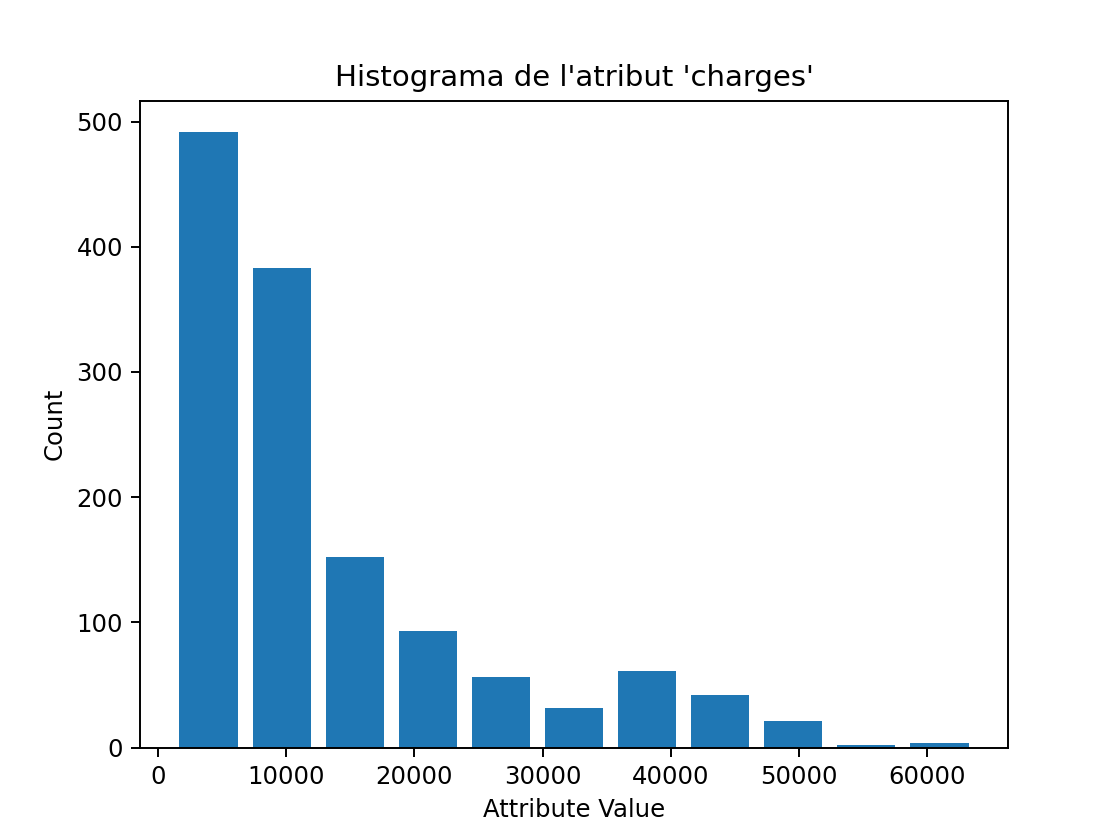

In [57]:
plt.figure()
plt.title("Histograma de l'atribut 'charges'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['charges'], bins=11, range=[np.min(dataset['charges']), np.max(dataset['charges'])], histtype="bar", rwidth=0.8)

També podem estudiar la correlació entre els diferents atributs per tal de saber si estan correlacionats entre ells.

<IPython.core.display.Javascript object>


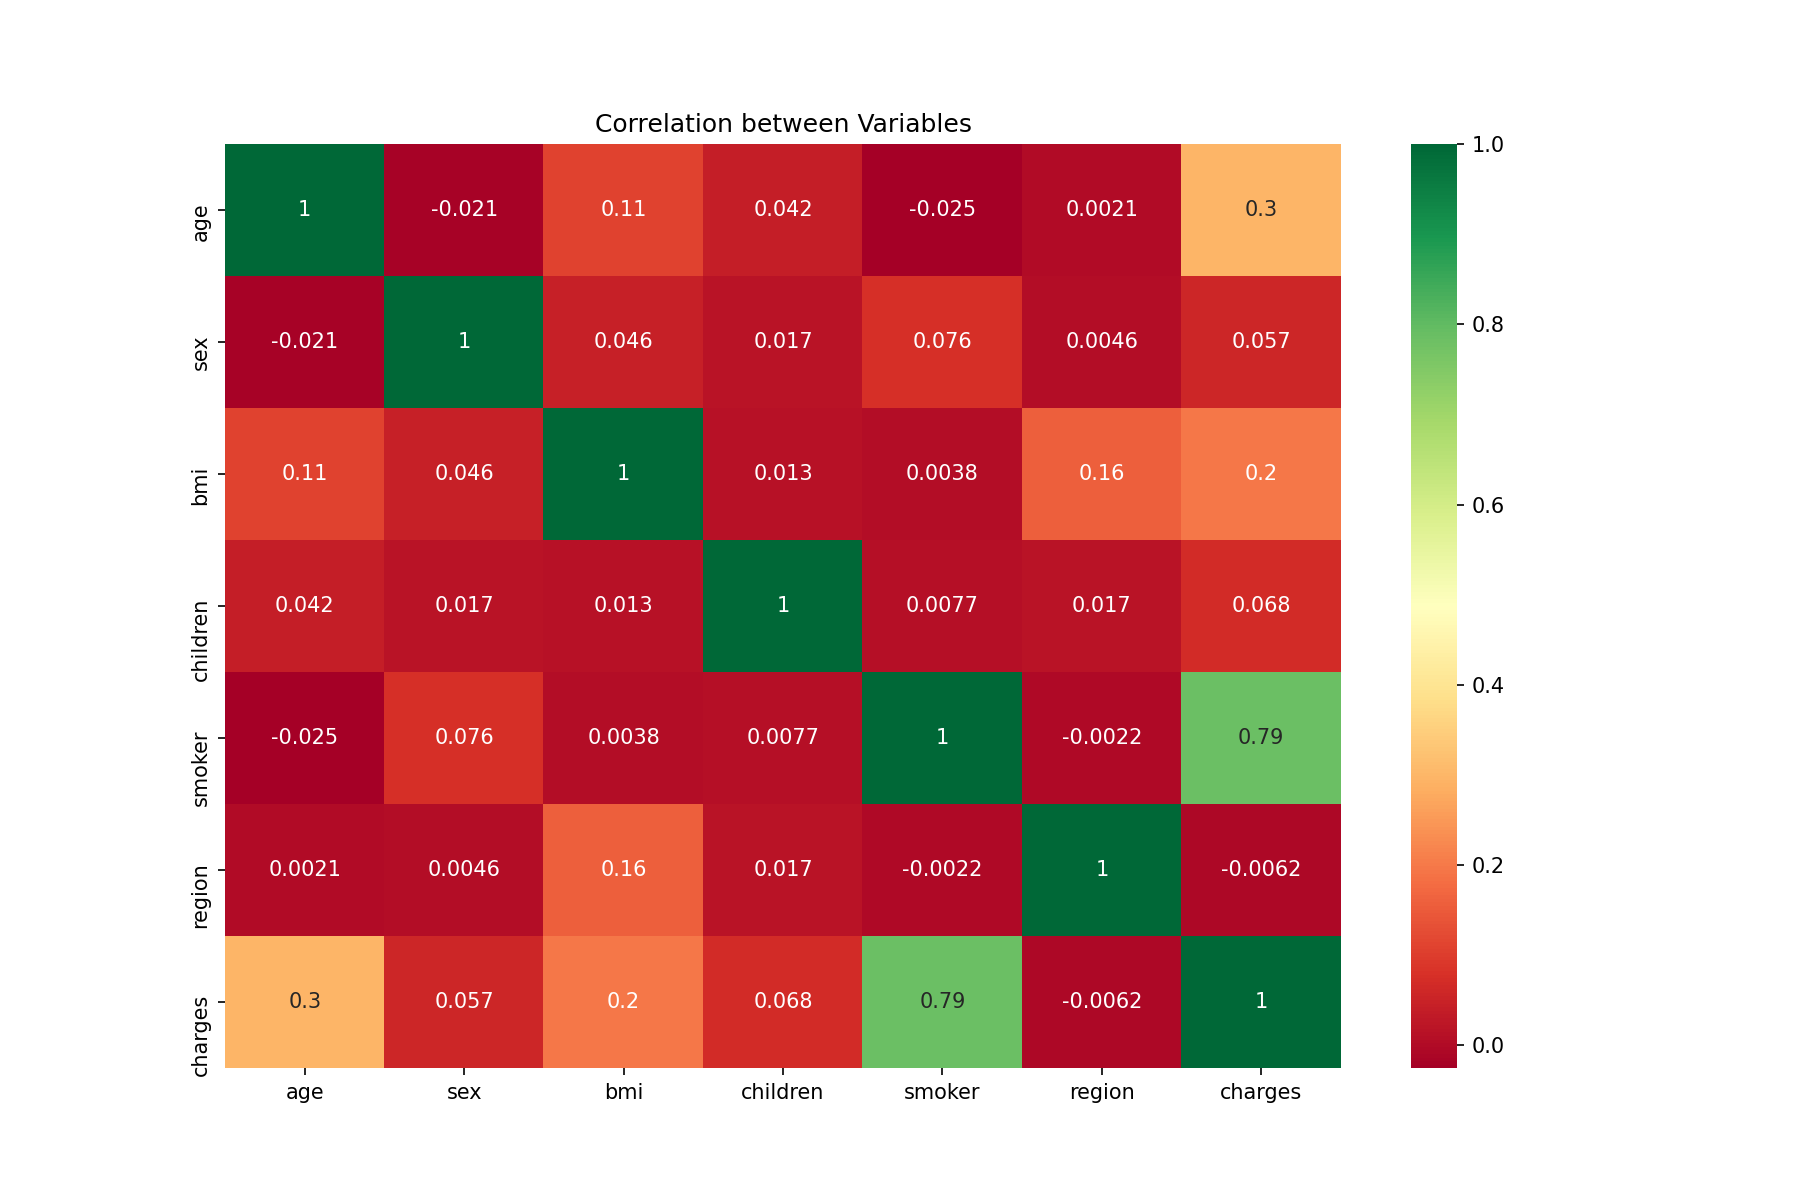

In [45]:
plt.figure(figsize=(12, 8))
import seaborn as sns
sns.heatmap(dataset.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

També podem utilitzar la funció pairplot per tal de veure els atributs que estan relacionats entre si.

<IPython.core.display.Javascript object>


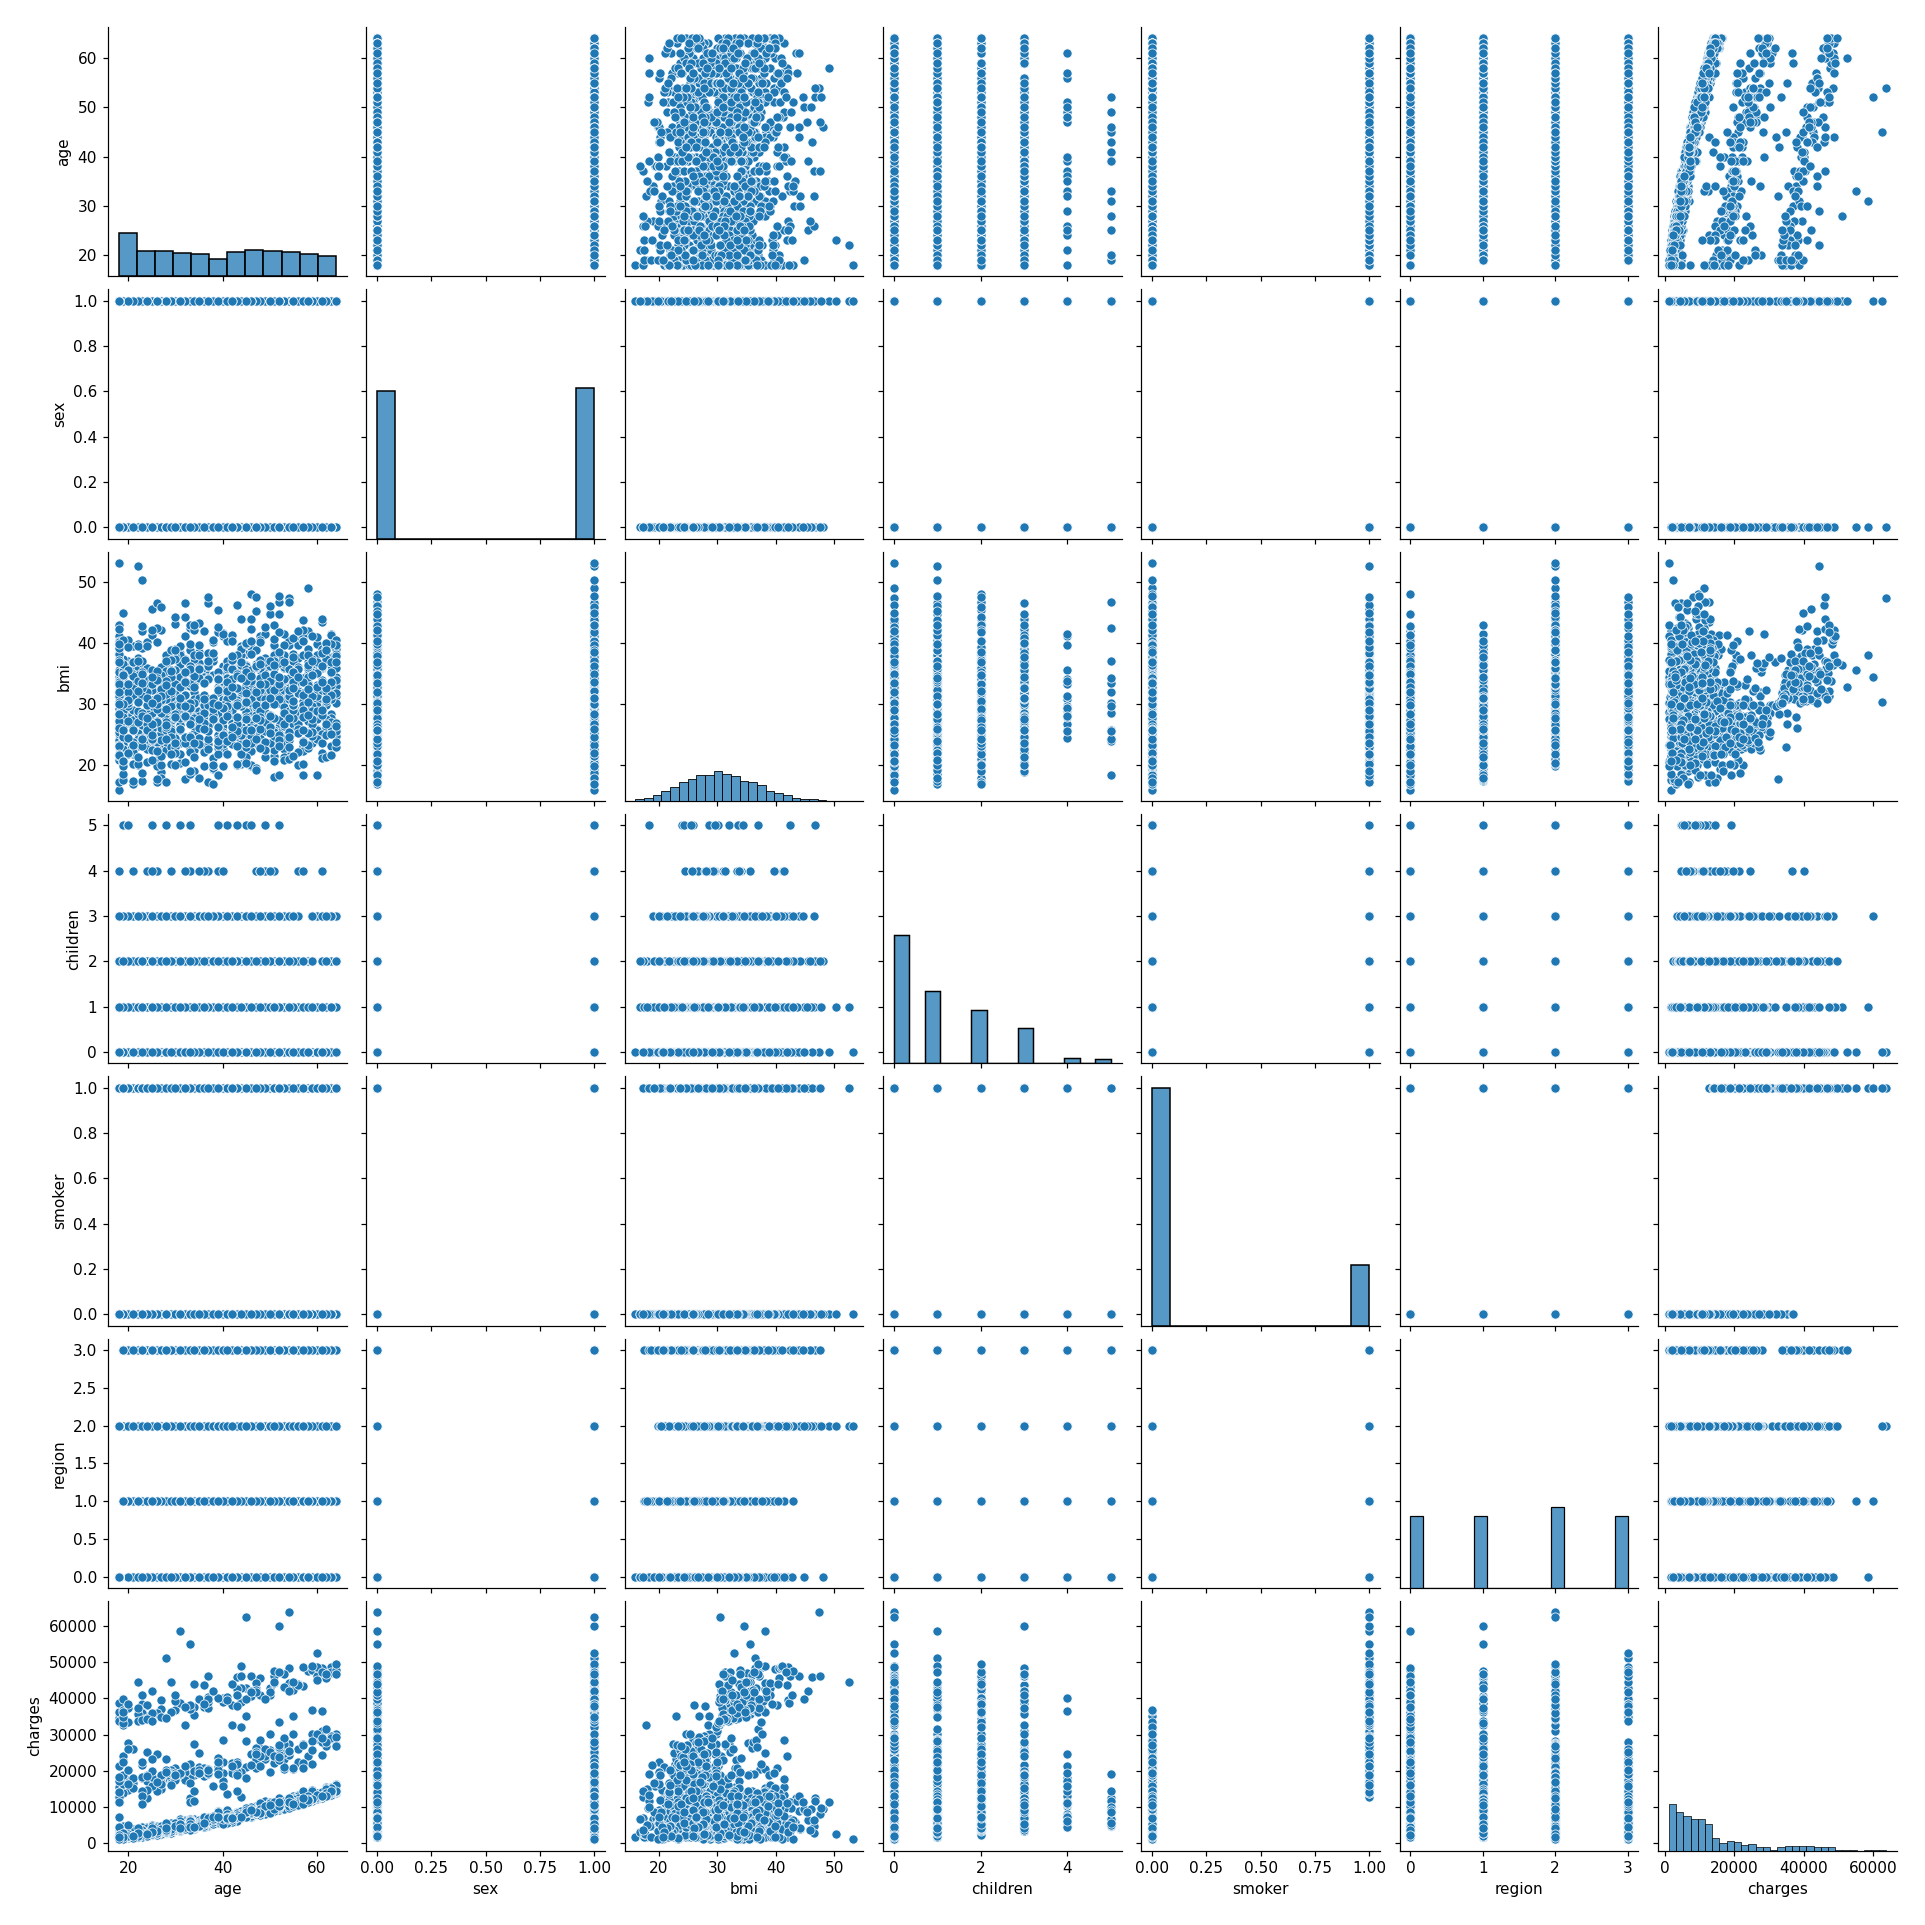

In [46]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(dataset)

Així doncs ara podreu respondre a les següents preguntes:

1. Quin és el tipus de cada atribut? 
2. Quins atributs tenen una distribució Guassiana?
3. Quin és l'atribut objectiu? Per què?

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix. 

A continuació se us dona una funció auxiliar per a calcular l'error quadràtic mitjà:

Per a agilitzar els càlculs es recomana utilitzar la llibreria numpy. Aquesta llibreria ens permet processar vectors sencers a la vegada de manera eficient i en paral·lel. Exemple:

In [9]:
import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')

vector1 = np.array([1,2,3,4]) # convertim llista de python a numpy array
vector2 = np.array([1,2,3,4]) 

# podem sumar dos vectors element a element
print("Suma vector1 + vector2 ", vector1 + vector2)

# podem sumar tots els valors d'un vector
print("Suma valors vector1 ", vector1.sum())

# calculem la mitjana
print("Mitjana vector1", vector1.mean())

# utilitzem un vector com a índex de l'altre
# vector3 = vector1  # necesitem fer una copia del vector per no modificar el original
vector3 = vector1.copy()
vector3[vector2 == 1] = 5
print("Vector1 amb un 5 on el Vector2 te 1s ", vector3)

# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

print("MSE: ", mse(vector1, vector2))

Suma vector1 + vector2  [2 4 6 8]
Suma valors vector1  10
Mitjana vector1 2.5
Vector1 amb un 5 on el Vector2 te 1s  [5 2 3 4]
MSE:  0.0


Per a la regressió podeu utilitzar la llibreria sklearn:

In [10]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

Finalment, si la funció `fit` del regressor logístic dónes l'error: `ValueError: Unknown label type: 'unknown'`, caldria afegir a la definició de l'atribut a trobar $y$ la crida a la funció `.astype('int')` per tal de obligar a que les dades siguin de tipus sencer, deixant el codi com segueix:

`y = data[:,2].astype('int')`

A continuació, es modificaran tots els atributs mitjançant **procediments de normalització (normal, estàndard)**, i s'avaluarà el rendiment del regressor après. Per a això, caldrà analitzar la mitja i variança de cada variable per totes les mostres, per identificar aquells valors que tenen una distribució normal, els preferits per fer regressió, i descartar altres atributs que no són representatius per fer la regressió, i que afegeixen soroll al model. 

Pel que fa a l'error resultant de la regressió, recordeu que es calcula fent la diferència entre el valor predit i el real al quadrat: així doncs, si les dades tenen valors grans (tipus 10^3), l'error al quadrat podria acabar sent 10^6. Per això és important normalitzar abans (escalar les dades a un rang més petit).

<img src="images/standarization.png">

Podeu estandarditzar les dades amb les funcions mean i std de numpy i mostrar l'hisotgrama de nou. Recuperant l'exemple de l'apartat anterior:

In [31]:
def standarize(x_train):
    n = len(x_train)
    mean = x_train.mean(0)
    std = x_train.std(0)
    mean_v = np.full(n, mean)
    x_t = x_train - mean_v
    std_v = np.full(n, std)
    x_t /= std_v
    return x_t


In [47]:
sex = np.array(dataset['sex'])
charges = np.array(dataset['charges'])
age = np.array(dataset['age'])
bmi = np.array(dataset['bmi'])
smoker = np.array(dataset['smoker'])
region = np.array(dataset['region'])
children = np.array(dataset['children'])

charges_t = standarize(charges)
sex_t = standarize(sex)
age_t = standarize(age)
bmi_t = standarize(bmi)
smoker_t = standarize(smoker)
region_t = standarize(region)
children_t = standarize(children)

<IPython.core.display.Javascript object>


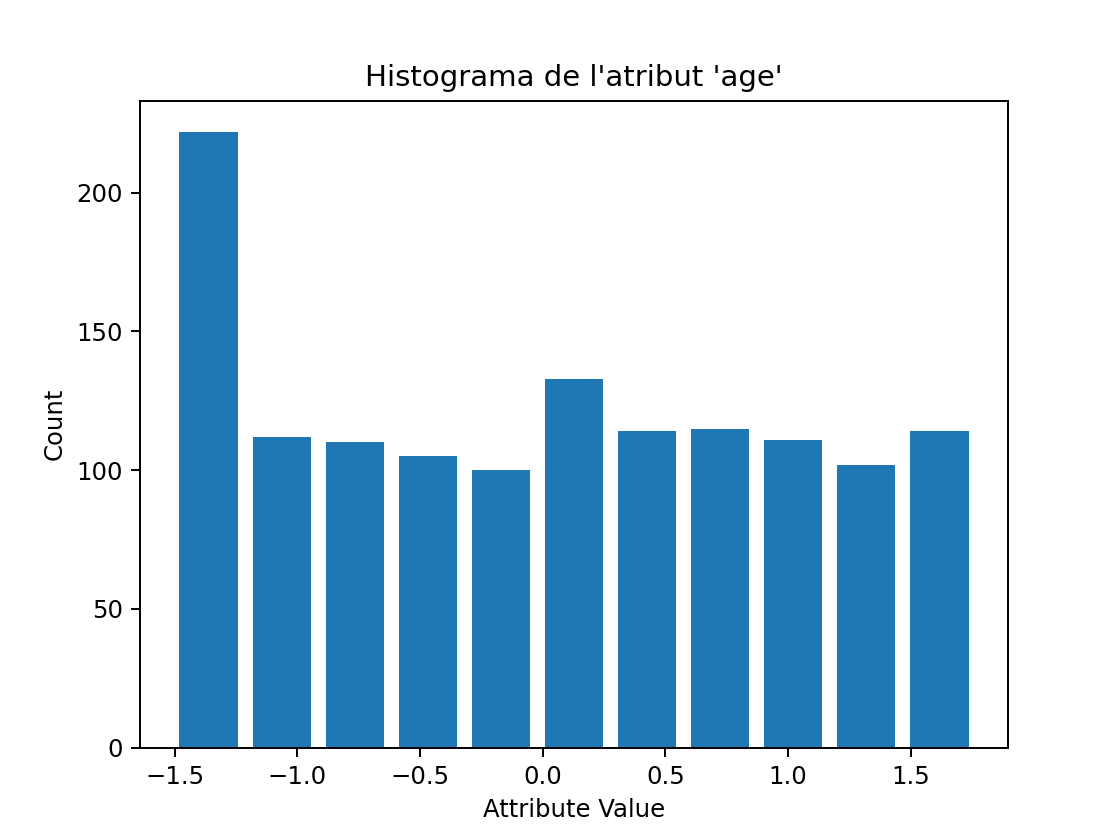

In [51]:
plt.figure()
plt.title("Histograma de l'atribut 'age'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(age_t, bins=11, range=[np.min(age_t), np.max(age_t)], histtype="bar", rwidth=0.8)

Ara ja podeu comprovar la diferència entre entrenar amb els atributs estandaritzats i si aquells que tenen una distribució més semblant a la normal donen millors resultats. 
Finalment, s'aprendrà un model regressor tenint en compte tots aquells atributs que tenen una millor distribució de valors (lineal, això és, l'histograma de valors té forma de gaussiana), i es calcularà l'error assolit en la predicció. 

Recordeu que el valor sobre el que heu de fer la regressió queda al vostre criteri: **heu d'explicar a la memòria quin atribut heu fet servir, no hi ha una decisió única correcta, cal que doneu raons de per què heu triat l'atribut que hàgiu triat.**

Així per exemple pode mirar:

* Que l'objectiu de la regressió sigui un valor ordinal (1 > 2 > 3). Si no n'hi ha cap, explicar-ho a la memòria.

* Que sigui útil en alguna aplicació real (per exemple predir si plourà és més interessant que predir el color dels núvols).

* Que tingui certa variació (un atribut que és sempre 0, no té gaire interès)

I en definitiva explicar el criteri a seguir, tant amb paraules com amb gràfiques (per exemple histograma), o estadístiques (per exemple la variança dels atributs) si escau.

Un cop escollit l'atribut objectiu, caldrà justificar si l'error obtingut és, en proporció, menor que tenint en compte únicament el millor atribut identificat al primer punt. 

Podeu utilitzar les funcions hist de matplotlib per a calcular els histogrames. Exemple:

<IPython.core.display.Javascript object>


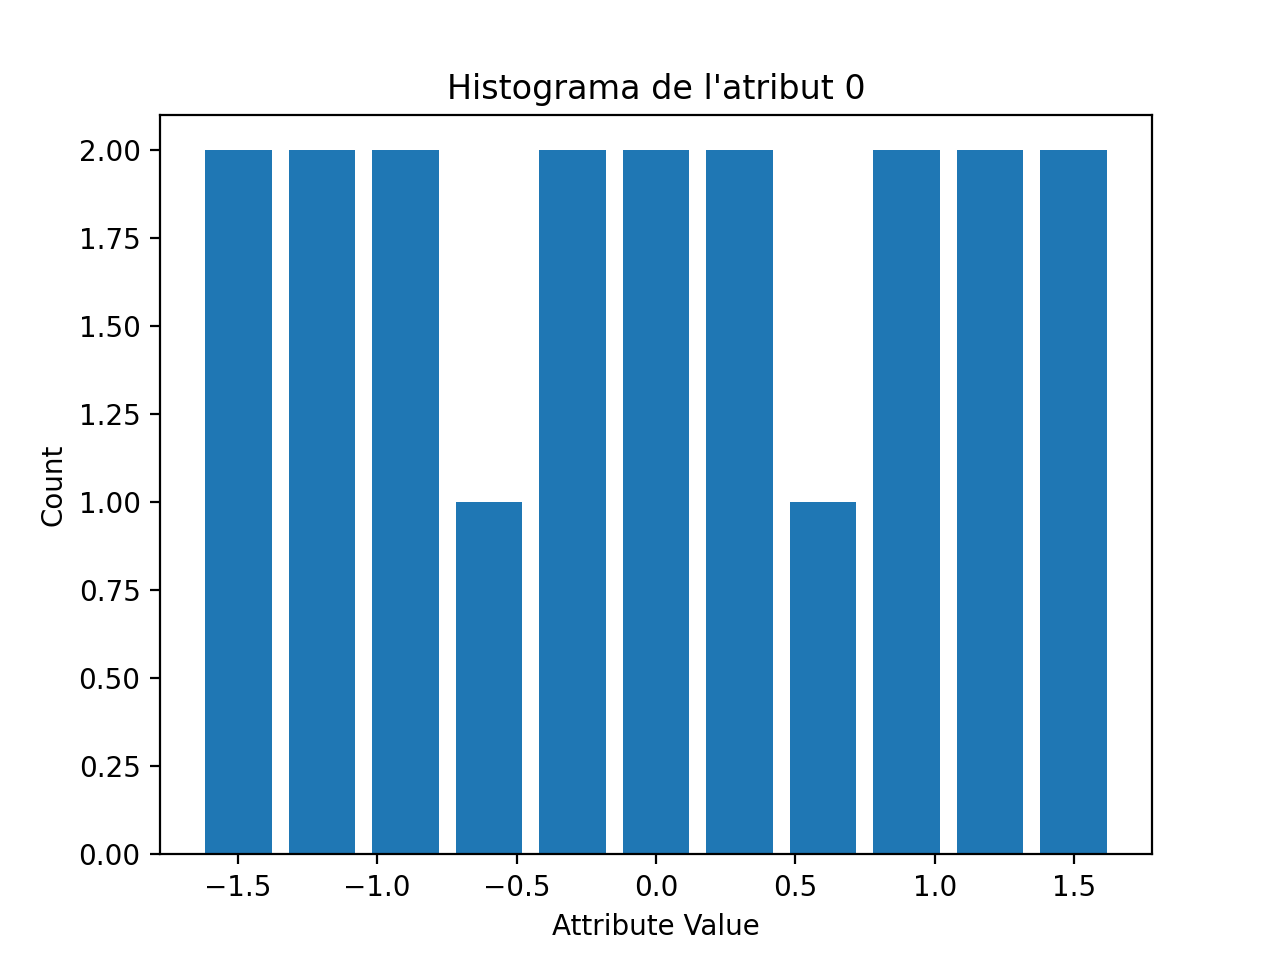

In [28]:
plt.figure()
plt.title("Histograma de l'atribut 0")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x_t[:,0], bins=11, range=[np.min(x_t[:,0]), np.max(x_t[:,0])], histtype="bar", rwidth=0.8)

o utilitzar les funcions de visualitzación del propi pandas.

<IPython.core.display.Javascript object>


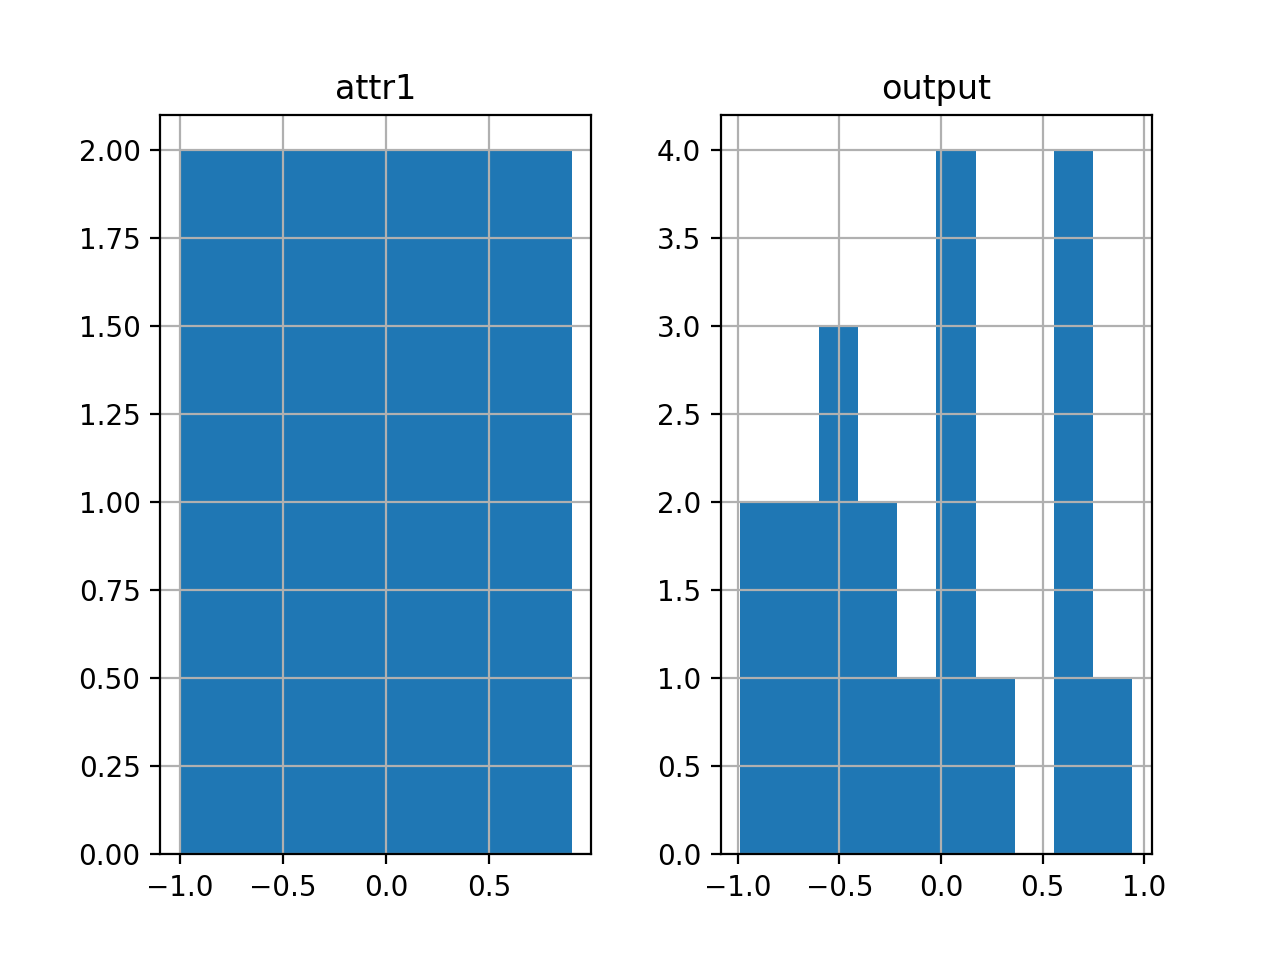

array([[<AxesSubplot:title={'center':'attr1'}>,
        <AxesSubplot:title={'center':'output'}>]], dtype=object)

In [34]:
dataset.drop(['attr2'],1).hist()

Ara que hem carregat les dades podem entrenar un regressor lineal per a aproximar la funció que les genera:

<IPython.core.display.Javascript object>


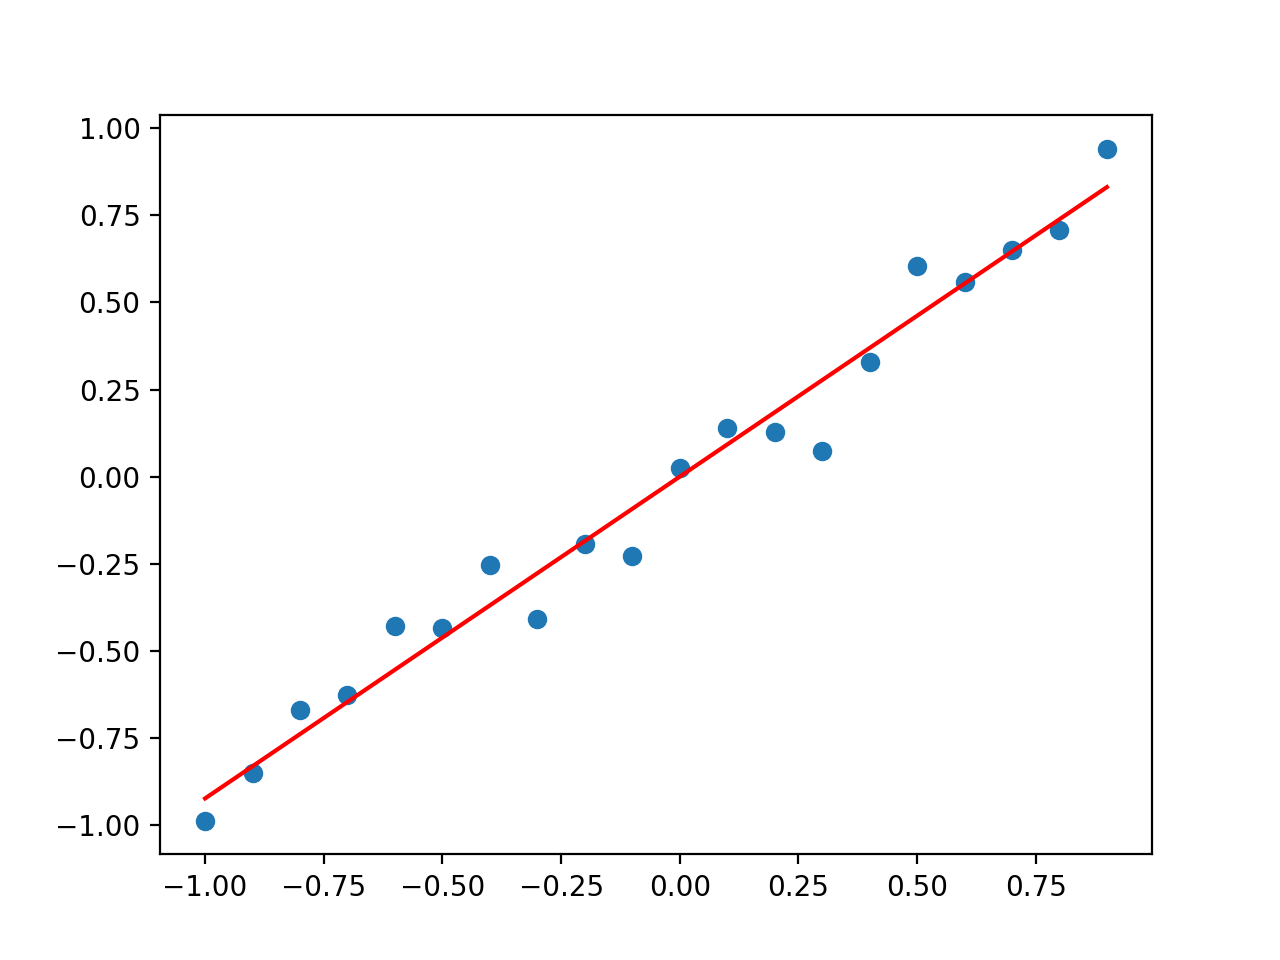

Mean squeared error:  0.007909002929129435
R2 score:  0.972870288656409


In [35]:
from sklearn.metrics import r2_score

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,0].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,0], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


Un cop mostrats de manera adient, (en forma de taula, i/o de gràfics si la dimensionalitat ho permet) els resultats aconseguits amb la regressió, avaluarem de manera independent la idonietat de cadascun dels atributs.

In [36]:
""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))


Error en atribut 0: 0.000586
R2 score en atribut 0: 0.997322
Error en atribut 1: 0.000586
R2 score en atribut 1: 0.997322


Quan es treballa en dades n-dimensionals (més d'un atribut), una opció és reduir la seva n-dimensionalitat aplicant un Principal Component Analysis (PCA) i quedar-se amb els primers 2 o 3 components, obtenint unes dades que (ara sí) poden ser visualitzables en el nou espai. Existeixen altres embeddings de baixa dimensionalitat on poder visualitzar les dades?

Així es podrà contestar a aquestes **preguntes**:

1. Quin són els atributs més importants per fer una bona predicció?

2. Amb quin atribut s'assoleix un MSE menor?

3. Quina correlació hi ha entre els atributs de la vostra base de dades?

4. Com influeix la normalització en la regressió?

5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?

6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?


# Apartat (A): El descens del gradient  

En aquest exercici, es tracta d'implementar en python el procés de descent del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(w) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; w) - y^{i})^2 + \lambda\sum_{j=1}^{n}(w_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$w_0 = w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot 1$$
$$w_j = w_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}w_{j} \right]$$


ó:

$$w_{j} := w_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $w_0$ i $w_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="images/gradient_descent.png">

Per a la implementació us podeu basar en el següent esquelet:

In [16]:
class Regressor(object):
    def __init__(self, w0, w1, alpha):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha

        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        pass
    
    def __update(self, hy, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        pass
    
    def train(self, max_iter, epsilon):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        pass

L'últim pas serà validar el regressor trobat pel descent del gradient desenvolupat en aquest apartat visualment, aplicat a un model de recta i un model de pla. Per a això, caldrà considerar el millor atribut identificat en el primer punt de l'anterior entrega per visualitzar la línia regressora en 2D (podeu mostrar dades 2d amb la funció scatter). Després, dos dels atributs identificats a l'últim punt del primer exercici per visualitzar el pla regressor en 3D (En el cas 3D l’scatter s’ha de fer sobre una figura amb projecció 3D).

<IPython.core.display.Javascript object>


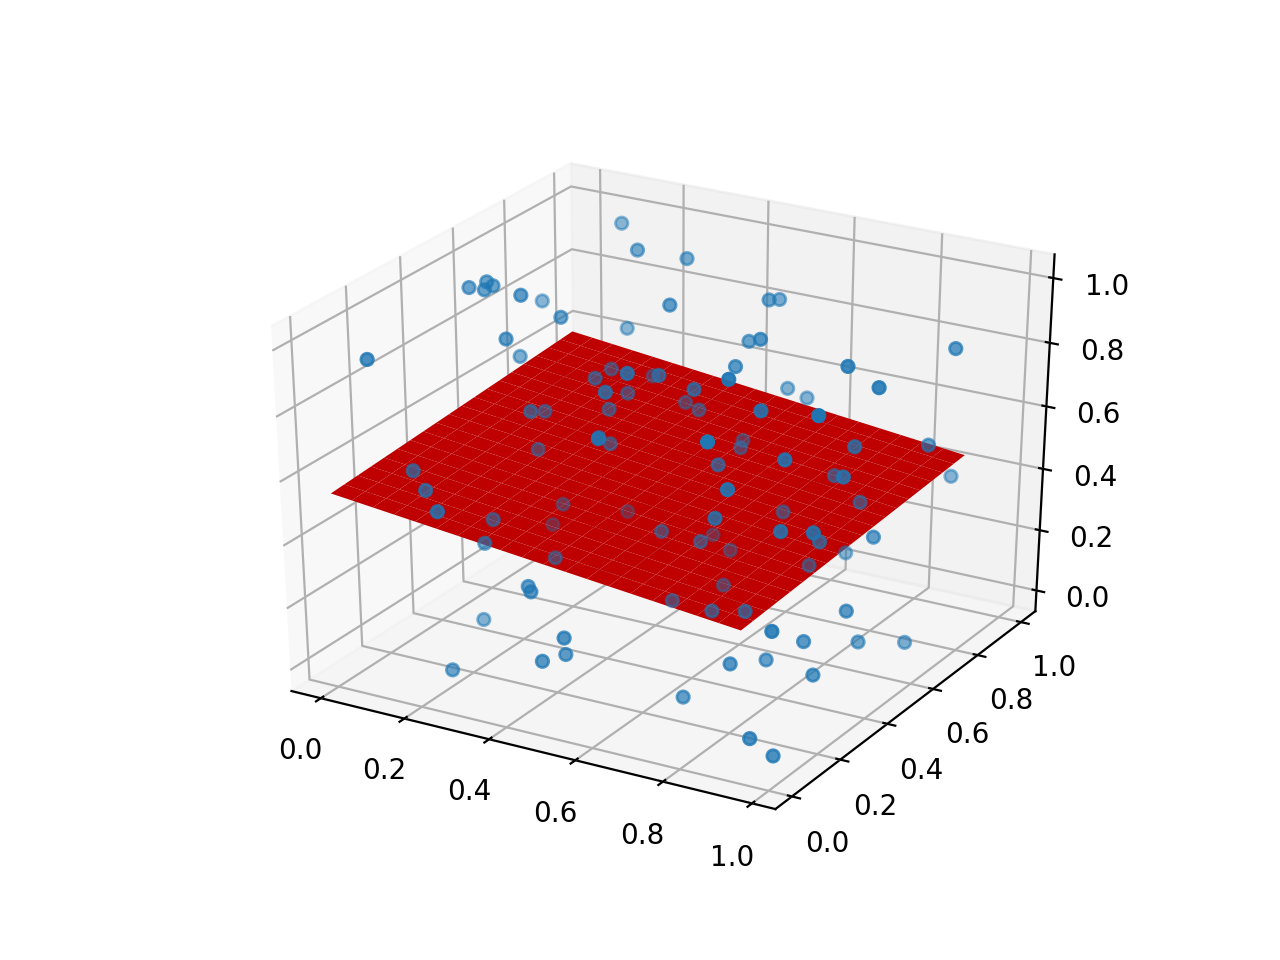

In [17]:
%matplotlib notebook

# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
x_val = np.random.random((100, 2))
y_val = np.random.random((100, 1))
regr = regression(x_val, y_val)
predX3D = regr.predict(x_val)

# Afegim els 1's
A = np.hstack((x_val,np.ones([x_val.shape[0],1])))
w = np.linalg.lstsq(A,predX3D)[0]

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_val[:,0],x_val[:,1],y_val)

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? Quins valors de learning rate convergeixen més ràpid a la solució òptima? Com influeix la inicialització del model en el resultat final? 

2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?

3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?

3. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?

4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 

5. Ajuda la visualització a identificar aquelles mostres per a les que el regressor obté els pitjors resultats de predicció? 
